In [67]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [68]:
# some global config
GLB_DISPLAY_DATA = False
GLB_USE_1D_CNN = False # todo

In [69]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

TESS = "toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "cremad/AudioWAV/"

# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [70]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

In [71]:
if GLB_DISPLAY_DATA:
    # use the well known Librosa library for this task 
    fname = SAVEE + 'DC_f11.wav'  
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(data, sr=sampling_rate)

    # Lets play the audio 
    ipd.Audio(fname)

In [72]:
# Lets play a happy track
if GLB_DISPLAY_DATA:
    fname = SAVEE + 'DC_h11.wav'  
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(data, sr=sampling_rate)

    # Lets play the audio 
    ipd.Audio(fname)

In [73]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: labels, dtype: int64

In [74]:
# Pick a fearful track
if GLB_DISPLAY_DATA:
    fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(data, sr=sampling_rate)

    # Lets play the audio 
    ipd.Audio(fname)

In [75]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [76]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

In [77]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [78]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [79]:
if GLB_DISPLAY_DATA:
    fname = CREMA + '1012_IEO_HAP_HI.wav'  
    data, sampling_rate = librosa.load(fname)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(data, sr=sampling_rate)

    # Lets play the audio 
    ipd.Audio(fname)

In [80]:
df_all_DB = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df_all_DB.labels.value_counts())
df_all_DB.head()
df_all_DB.to_csv("Data_path.csv",index=False)


female_happy       1096
female_sad         1096
female_angry       1096
female_fear        1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


In [81]:
# Delte specific datasets dataframes to save data
del SAVEE_df
del RAV_df
del TESS_df
del CREMA_df

In [82]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

In [83]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
if GLB_DISPLAY_DATA:
    path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

    # audio wave
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    librosa.display.waveplot(X, sr=sample_rate)
    plt.title('Audio sampled at 44100 hrz')

    # MFCC
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

    ipd.Audio(path)

In [84]:
if GLB_DISPLAY_DATA:
    # Source - RAVDESS; Gender - Male; Emotion - Angry 
    path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

    # audio wave
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    librosa.display.waveplot(X, sr=sample_rate)
    plt.title('Audio sampled at 44100 hrz')

    # MFCC
    plt.figure(figsize=(20, 15))
    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

    ipd.Audio(path)

In [85]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

AttributeError: module 'matplotlib' has no attribute 'cm'

In [ ]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("/kaggle/working/Data_path.csv")
ref.head()

,labels,source,path
0,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
1,male_fear,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
2,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
3,male_disgust,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...
4,male_angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...


In [ ]:
df_all_DB = pd.DataFrame(columns=['feature'])

In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 


# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df_all_DB.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df_all_DB))
df_all_DB.head()

12162


,feature
0,"[-25.742002, -26.182264, -25.46856, -25.198936..."
1,"[-41.184326, -38.8279, -39.00878, -41.50939, -..."
2,"[-25.528027, -23.866304, -22.509321, -22.32029..."
3,"[-24.981075, -23.702238, -24.368538, -23.82428..."
4,"[-16.746675, -18.525644, -22.264181, -22.01650..."


In [ ]:
# Now extract the mean bands to its own feature columns
df_all_DB = pd.concat([ref,pd.DataFrame(df_all_DB['feature'].values.tolist())],axis=1)
df_all_DB[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-25.742002,-26.182264,-25.468559,-25.198936,-25.429790,-23.347939,-16.800249,...,-3.119452,-4.260778,-5.274271,-5.775263,-7.272361,-7.340222,-7.019254,-8.643790,-15.420983,-19.470568
1,male_fear,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-41.184326,-38.827900,-39.008781,-41.509392,-39.770164,-34.743954,-30.551401,...,-27.156342,-25.647068,-25.140007,-26.746456,-27.039560,-27.250130,-26.599070,-25.778677,-24.685333,-25.448017
2,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-25.528027,-23.866304,-22.509321,-22.320293,-17.513348,-12.073629,-9.537951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_disgust,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-24.981075,-23.702238,-24.368538,-23.824282,-20.085262,-20.491526,-21.797201,...,-11.261946,-12.151450,-13.157601,-13.586168,-14.427001,-15.093400,-13.683898,-13.934832,-9.288823,-4.696515
4,male_angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-16.746675,-18.525644,-22.264181,-22.016502,-23.868864,-23.068272,-23.807617,...,-27.922167,-27.525471,-27.459105,-26.916111,-27.472069,-29.056606,-28.666271,-28.376913,-24.786333,-21.834438


In [ ]:
# replace NA with 0
df_all_DB=df_all_DB.fillna(0)
print(df_all_DB.shape)
df_all_DB[:5]

(12162, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-25.742002,-26.182264,-25.468559,-25.198936,-25.429790,-23.347939,-16.800249,...,-3.119452,-4.260778,-5.274271,-5.775263,-7.272361,-7.340222,-7.019254,-8.643790,-15.420983,-19.470568
1,male_fear,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-41.184326,-38.827900,-39.008781,-41.509392,-39.770164,-34.743954,-30.551401,...,-27.156342,-25.647068,-25.140007,-26.746456,-27.039560,-27.250130,-26.599070,-25.778677,-24.685333,-25.448017
2,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-25.528027,-23.866304,-22.509321,-22.320293,-17.513348,-12.073629,-9.537951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_disgust,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-24.981075,-23.702238,-24.368538,-23.824282,-20.085262,-20.491526,-21.797201,...,-11.261946,-12.151450,-13.157601,-13.586168,-14.427001,-15.093400,-13.683898,-13.934832,-9.288823,-4.696515
4,male_angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-16.746675,-18.525644,-22.264181,-22.016502,-23.868864,-23.068272,-23.807617,...,-27.922167,-27.525471,-27.459105,-26.916111,-27.472069,-29.056606,-28.666271,-28.376913,-24.786333,-21.834438


In [ ]:
# Split between train and test 

df_split = df_all_DB

X_train, X_test, y_train, y_test = train_test_split(df_split.drop(['path','labels','source'],axis=1)
                                                    , df_split.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,-18.611179,-17.616539,-18.411484,-18.987419,-17.404621,-16.747271,-17.733747,-18.055025,-17.931210,-15.913172,...,-22.899401,-21.647818,-19.758654,-18.879402,-19.397377,-20.171659,-22.689241,-24.612814,-24.153776,-22.703135
3860,-9.868549,-13.604155,-22.991428,-23.026094,-23.829100,-25.663256,-27.393667,-25.888630,-23.965645,-26.182096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9761,-1.533947,-4.030602,-9.614023,-12.045173,-9.992991,-11.926253,-14.008467,-13.561553,-14.024568,-15.151947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7620,-4.531077,-3.933792,-4.567833,-5.871509,-5.282474,-6.490459,-8.156466,-9.188803,-8.681725,-8.212409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11586,-20.621702,-21.587507,-20.563646,-20.703461,-21.205715,-18.608534,-18.446669,-16.211845,-14.257651,-15.160404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7914,-17.514990,-18.551863,-17.043016,-16.977903,-19.369633,-19.562126,-22.008749,-20.178385,-17.989597,-19.336285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9513,-18.740370,-18.824932,-16.149488,-16.963459,-18.229979,-18.183954,-19.274342,-18.395123,-16.951286,-16.672031,...,-17.882130,-19.390711,-17.779472,-19.165974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5835,-19.066849,-18.328381,-17.710287,-18.043196,-18.252480,-18.710625,-16.626354,-17.831005,-18.028343,-17.859108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5389,-20.760590,-20.047138,-18.961346,-19.468687,-19.316292,-18.162563,-18.102333,-19.914133,-20.931385,-19.215496,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11222,-18.252922,-17.727369,-19.222475,-18.469971,-17.572325,-17.850542,-17.932026,-20.588900,-18.612183,-15.990726,...,-18.065437,-18.135092,-19.665306,-20.741905,-20.273033,-18.371035,-15.576723,-17.512489,-17.008547,-18.195284


In [ ]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,0.187649,0.303679,0.437804,0.388167,0.498043,0.541575,0.460526,0.431708,0.435392,0.581449,...,-0.878954,-0.811447,-0.690980,-0.628895,-0.674771,-0.717912,-0.861334,-0.984314,-0.967966,-0.877821
3860,0.797906,0.594947,0.097967,0.088987,0.022954,-0.117946,-0.252142,-0.145765,-0.009364,-0.175075,...,0.540241,0.526783,0.526252,0.526960,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
9761,1.379681,1.289913,1.090585,0.902439,1.046131,0.898188,0.735362,0.762955,0.723323,0.637529,...,0.540241,0.526783,0.526252,0.526960,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
7620,1.170474,1.296941,1.465019,1.359775,1.394472,1.300277,1.167097,1.085303,1.117107,1.148773,...,0.540241,0.526783,0.526252,0.526960,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
11586,0.047310,0.015417,0.278111,0.261045,0.216953,0.403896,0.407930,0.567582,0.706144,0.636906,...,0.540241,0.526783,0.526252,0.526960,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
7914,0.264166,0.235782,0.539346,0.537029,0.352731,0.333358,0.145135,0.275179,0.431088,0.329264,...,0.540241,0.526783,0.526252,0.526960,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
9513,0.178632,0.215959,0.605646,0.538099,0.437008,0.435302,0.346868,0.406637,0.507615,0.525542,...,-0.568008,-0.671917,-0.569052,-0.646439,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
5835,0.155843,0.252005,0.489833,0.458113,0.435344,0.396344,0.542225,0.448222,0.428233,0.438089,...,0.540241,0.526783,0.526252,0.526960,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
5389,0.037615,0.127236,0.397003,0.352515,0.356675,0.436885,0.433334,0.294659,0.214270,0.338162,...,0.540241,0.526783,0.526252,0.526960,0.512330,0.512331,0.512959,0.501061,0.496078,0.491704
11222,0.212657,0.295633,0.377627,0.426498,0.485641,0.459965,0.445898,0.244917,0.385202,0.575735,...,-0.579368,-0.594296,-0.685229,-0.742923,-0.728361,-0.608095,-0.430527,-0.555811,-0.534869,-0.605893


In [ ]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

In [ ]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 256)          

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_test, y_test)) # NOTE: I degressesed epeoch count for initial testing

Train on 9121 samples, validate on 3041 samples
Epoch 1/20
9121/9121 [==============================] - 99s 11ms/step - loss: 2.4020 - accuracy: 0.1920 - val_loss: 2.4444 - val_accuracy: 0.2378
Epoch 2/20
9121/9121 [==============================] - 165s 18ms/step - loss: 2.1854 - accuracy: 0.2632 - val_loss: 2.2157 - val_accuracy: 0.2841
Epoch 3/20
9121/9121 [==============================] - 98s 11ms/step - loss: 2.0710 - accuracy: 0.2909 - val_loss: 2.1407 - val_accuracy: 0.3114
Epoch 4/20
9121/9121 [==============================] - 99s 11ms/step - loss: 2.0045 - accuracy: 0.3109 - val_loss: 2.0782 - val_accuracy: 0.3387
Epoch 5/20
9121/9121 [==============================] - 103s 11ms/step - loss: 1.9493 - accuracy: 0.3304 - val_loss: 2.0404 - val_accuracy: 0.3410
Epoch 6/20
9121/9121 [==============================] - 99s 11ms/step - loss: 1.9048 - accuracy: 0.3424 - val_loss: 2.0064 - val_accuracy: 0.3598
Epoch 7/20
9121/9121 [==============================] - 96s 10ms/step - lo

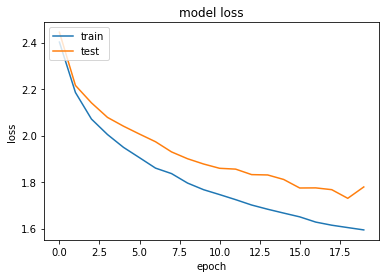

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/Emotion_Model.h5 


In [ ]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 40.25%


In [ ]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

3041/3041 [==============================] - 8s 3ms/step


array([ 4,  3,  8, ..., 11,  4,  0])

In [ ]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

,actualvalues,predictedvalues
170,male_sad,female_sad
171,female_disgust,female_fear
172,male_angry,female_angry
173,female_disgust,female_disgust
174,male_angry,male_angry
175,female_fear,female_angry
176,male_fear,male_neutral
177,female_fear,female_neutral
178,female_happy,female_neutral
179,female_neutral,female_neutral


In [ ]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,581
female_disgust,230
female_fear,220
female_happy,295
female_neutral,549
female_sad,377
female_surprise,141
male_angry,142
male_disgust,66


In [ ]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.4024991779020059


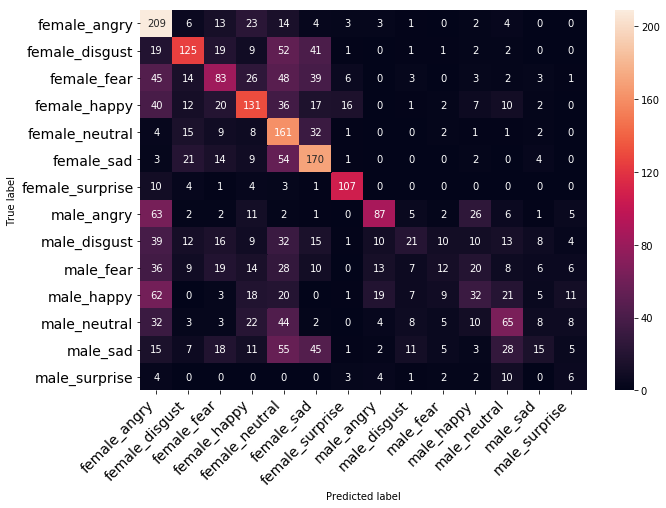

In [ ]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.36      0.74      0.48       282
 female_disgust       0.54      0.46      0.50       272
    female_fear       0.38      0.30      0.34       273
   female_happy       0.44      0.45      0.44       294
 female_neutral       0.29      0.68      0.41       236
     female_sad       0.45      0.61      0.52       278
female_surprise       0.76      0.82      0.79       130
     male_angry       0.61      0.41      0.49       213
   male_disgust       0.32      0.10      0.16       200
      male_fear       0.24      0.06      0.10       188
     male_happy       0.27      0.15      0.20       208
   male_neutral       0.38      0.30      0.34       214
       male_sad       0.28      0.07      0.11       221
  male_surprise       0.13      0.19      0.15        32

       accuracy                           0.40      3041
      macro avg       0.39      0.38      0.36      3041
   weighted avg       0.40   

0.7527129233804669


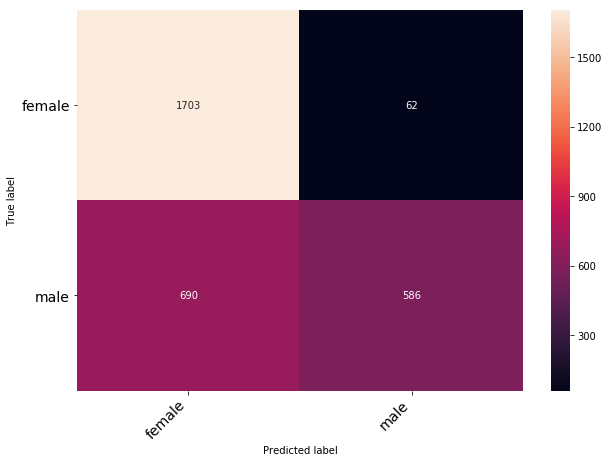

In [ ]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.71      0.96      0.82      1765
        male       0.90      0.46      0.61      1276

    accuracy                           0.75      3041
   macro avg       0.81      0.71      0.71      3041
weighted avg       0.79      0.75      0.73      3041



0.47484380138112464


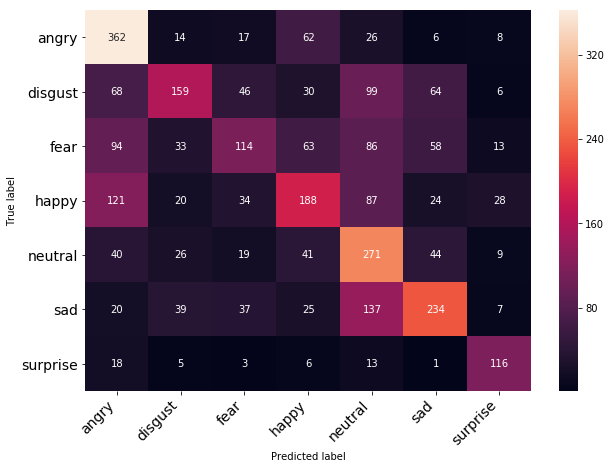

In [ ]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.50      0.73      0.59       495
     disgust       0.54      0.34      0.41       472
        fear       0.42      0.25      0.31       461
       happy       0.45      0.37      0.41       502
     neutral       0.38      0.60      0.46       450
         sad       0.54      0.47      0.50       499
    surprise       0.62      0.72      0.66       162

    accuracy                           0.47      3041
   macro avg       0.49      0.50      0.48      3041
weighted avg       0.48      0.47      0.46      3041



## 2D CNN

In [ ]:
import cv2
def scale_minmax(X, min=0.0, max=1.0):
        X_std = (X - X.min()) / (X.max() - X.min())
        X_scaled = X_std * (max - min) + min
        return X_scaled


def spectrogram_image(y, sr, out_dir, out_name, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=hop_length*2, hop_length=hop_length)
    # mels = librosa.feature.melspectrogram(y=y, sr=sr)
    
    if 1:
        mels = np.log(mels + 1e-9) # add small number to avoid log(0)
    else:  #testing !
        mels = np.mean(mels, axis=0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255 - img            # invert. make black==more energy

    # save as PNG
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    
    cv2.imwrite((out_dir + "//" + out_name), img)


def save_wav_to_png(df, DATA_SAMPLES_CNT, BASE_PATH, IMG_HEIGHT, IMG_WIDTH, use_Kfold = False):
    """ 
    Saves spectograms data from sound files as png pictures
    """
    print("Saving pictures to drive")
    for i in range(DATA_SAMPLES_CNT):
        file_name = BASE_PATH  + "//audio//" + str(df["filename"][i])
        y, sr = librosa.load(file_name, res_type='kaiser_fast') 
        
        img_name = 'out' + str(i+1) + "_" + str(df["target"][i]) + '.png'
        hop_length = 512           # number of samples per time-step in spectrogram
        n_mels = IMG_HEIGHT        # number of bins in spectrogram. Height of image
        time_steps = IMG_WIDTH - 1 # number of time-steps. Width of image (TODO FIX it add 1 px to width!!)
        

        
        y = librosa.util.utils.fix_length(y, sr * 2.5)
        
        start_sample = 0 # starting at beginning
        length_samples = time_steps * hop_length
        window = y[start_sample:start_sample+length_samples]
        dir_name = "mel_img"
        
        spectrogram_image(y=window, sr=sr, out_dir=dir_name , out_name=img_name, hop_length=hop_length, n_mels=n_mels)
    print("Done saving pictures!")
    
      
print("OK")

OK


In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
#     break
    X_mel, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    IMG_HEIGHT = 256    
    IMG_WIDTH = 256
    
    img_name = 'out_nr' + str(counter+1) + '.png'
    hop_length = 512           # number of samples per time-step in spectrogram
    n_mels = IMG_HEIGHT        # number of bins in spectrogram. Height of image
    time_steps = IMG_WIDTH - 1 # number of time-steps. Width of image (TODO FIX it add 1 px to width!!)
        
    X_mel = librosa.util.utils.fix_length(X_mel, 110250) # 2.5 * sr
        
    start_sample = 0 # starting at beginning
    length_samples = time_steps * hop_length
    window = X_mel[start_sample:start_sample+length_samples]
    dir_name = "mel_img"
        
    spectrogram_image(y=window, sr=sample_rate, out_dir=dir_name , out_name=img_name, hop_length=hop_length, n_mels=n_mels)
    
    
    counter=counter+1
    
    if(counter % 500 == 0):
        print(counter)

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
0


,feature


In [ ]:
# os.remove("/kaggle/working//kaggle/working/mel_img\out111.png")
# # to delete directory:
# import shutil
# shutil.rmtree("/kaggle/working/mel_img")

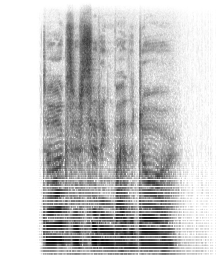

/kaggle/working/mel_img/out_nr1671.png


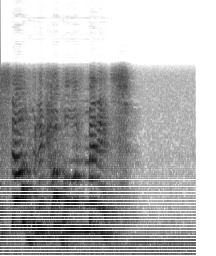

/kaggle/working/mel_img/out_nr5442.png


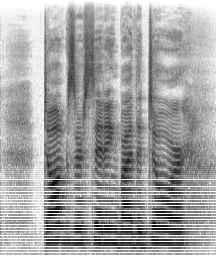

/kaggle/working/mel_img/out_nr1755.png


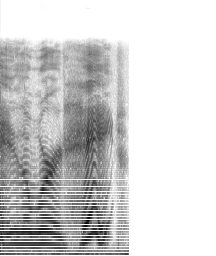

/kaggle/working/mel_img/out_nr2148.png


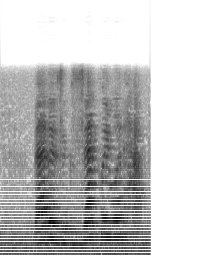

/kaggle/working/mel_img/out_nr6169.png


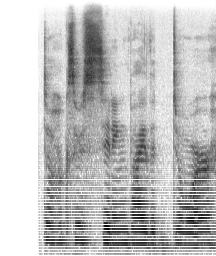

/kaggle/working/mel_img/out_nr811.png


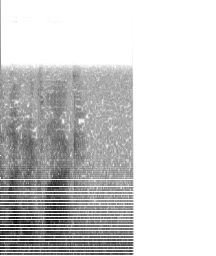

/kaggle/working/mel_img/out_nr9715.png


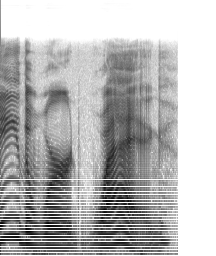

/kaggle/working/mel_img/out_nr3630.png


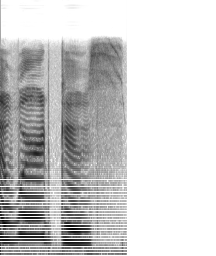

/kaggle/working/mel_img/out_nr4105.png


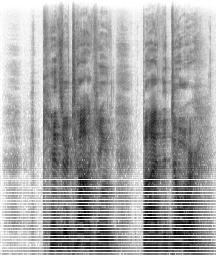

/kaggle/working/mel_img/out_nr1700.png


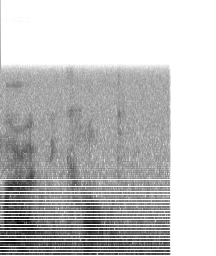

/kaggle/working/mel_img/out_nr9757.png


In [ ]:
# show some pics
from IPython.display import display
from PIL import Image
import os

pic_cnt = 0
path = "/kaggle/working/mel_img"

for filename in os.listdir(path):
    if filename.endswith(".png"):
        image_path = os.path.join(path, filename)
        image = Image.open(image_path)
        display(image)
        print(image_path)
        
        pic_cnt += 1
        if pic_cnt > 10:
            break

In [ ]:
# # os.list()
# os.listdir("/kaggle/working/mel_img")

In [ ]:
df_all_DB.head(15)

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-25.742002,-26.182264,-25.468559,-25.198936,-25.429790,-23.347939,-16.800249,...,-3.119452,-4.260778,-5.274271,-5.775263,-7.272361,-7.340222,-7.019254,-8.643790,-15.420983,-19.470568
1,male_fear,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-41.184326,-38.827900,-39.008781,-41.509392,-39.770164,-34.743954,-30.551401,...,-27.156342,-25.647068,-25.140007,-26.746456,-27.039560,-27.250130,-26.599070,-25.778677,-24.685333,-25.448017
2,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-25.528027,-23.866304,-22.509321,-22.320293,-17.513348,-12.073629,-9.537951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_disgust,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-24.981075,-23.702238,-24.368538,-23.824282,-20.085262,-20.491526,-21.797201,...,-11.261946,-12.151450,-13.157601,-13.586168,-14.427001,-15.093400,-13.683898,-13.934832,-9.288823,-4.696515
4,male_angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-16.746675,-18.525644,-22.264181,-22.016502,-23.868864,-23.068272,-23.807617,...,-27.922167,-27.525471,-27.459105,-26.916111,-27.472069,-29.056606,-28.666271,-28.376913,-24.786333,-21.834438
5,male_fear,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-25.793976,-25.637814,-25.623514,-24.908131,-24.204031,-23.441559,-22.504555,...,-8.755323,-8.886434,-10.918306,-11.311975,-10.998631,-9.800959,-9.060637,-9.556485,-3.739459,3.027151
6,male_happy,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-31.980324,-34.134651,-35.997036,-35.862972,-36.733601,-37.994278,-40.591640,...,-22.912577,-24.177086,-26.008902,-28.027077,-30.828884,-31.061953,-27.995094,-28.250278,-20.617218,-13.429229
7,male_surprise,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-24.375729,-25.236479,-25.401834,-25.771776,-24.432678,-24.807316,-15.526943,...,-10.636607,-9.978499,-9.980085,-10.219362,-11.655790,-14.255978,-15.985144,-15.443481,-10.061446,-4.703623
8,male_angry,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,11.171938,6.345472,-14.378910,-15.434625,-13.171748,-12.466777,-9.944688,...,-2.298828,-1.840616,-2.837490,-3.528642,-4.303277,-4.213942,-3.902624,-3.046322,-1.718035,0.842057
9,male_neutral,SAVEE,/kaggle/input/surrey-audiovisual-expressed-emo...,-5.150238,-5.560664,-6.080594,-6.025182,-6.717816,-8.054860,-7.151336,...,-9.476708,-8.633984,-9.095496,-9.131652,-8.692302,-9.081895,-9.833617,-9.933821,-9.279474,-8.336089


In [ ]:
print(y_train.size)
print(y_train.shape)
print(y_train)

print(y_test.size)
print(y_test.shape)

print(y_test)

127694
(9121, 14)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
42574
(3041, 14)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
png_count = 0
for filename in os.listdir(path):
    if filename.endswith(".png"):
        png_count = png_count +1
print(png_count)


12162


In [ ]:
df_all_DB.labels

0            male_happy
1             male_fear
2            male_happy
3          male_disgust
4            male_angry
              ...      
12157    female_disgust
12158       female_fear
12159      female_happy
12160    female_neutral
12161        female_sad
Name: labels, Length: 12162, dtype: object

In [ ]:
lb = LabelEncoder()
Y_mell = np_utils.to_categorical(lb.fit_transform(df_all_DB.labels))
# y_test_mell = np_utils.to_categorical(lb.fit_transform(y_test))
print(Y_mell)
print(Y_mell[0])
print(Y_mell[1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Invert the one-hot encoding
Y_mell_labels = np.argmax(Y_mell, axis=1)

print(Y_mell_labels)
print(min(Y_mell_labels))
print(max(Y_mell_labels))

[10  9 10 ...  3  4  5]
0
13


In [ ]:
def load_spectograms(DATA_SAMPLES_CNT, IMG_HEIGHT, IMG_WIDTH):
    print("Loading images from drive to RAM!")
    img_data_array = np.zeros((DATA_SAMPLES_CNT, IMG_HEIGHT, IMG_WIDTH))


    for i in range(0, DATA_SAMPLES_CNT):
        image_path = "//kaggle//working//mel_img//out_nr" + str(i+1) + ".png"
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB) # TODO FIX: check color map
        # image= cv2.imread(image_path)
        if image is None:
            print("Error, image was not found from: " + image_path)
            quit()
        image = np.array(image)
        image = image.astype('float32')
        image /= 255
        img_data_array[i] = image 
    print("Finish loading images from drive to RAM!")
    return img_data_array

samples_cnt = 12162
# samples_cnt = 8000
Y_mell_labels = Y_mell_labels[0:samples_cnt]
IMG_HEIGHT = 256    
IMG_WIDTH = 216
X_data_mell = load_spectograms(samples_cnt, IMG_HEIGHT, IMG_WIDTH)

Loading images from drive to RAM!
Finish loading images from drive to RAM!


In [ ]:
# del X_data_mell
# del x_train_mell
# del x_test_mell
# del y_train_mell
# del y_test_mell

In [ ]:
print(X_data_mell)

[[[0.92156863 0.96470588 0.96470588 ... 0.97254902 0.98039216 0.92156863]
  [0.91764706 0.96862745 0.97254902 ... 0.96470588 0.96078432 0.9137255 ]
  [0.94117647 0.96078432 0.95294118 ... 0.95686275 0.96470588 0.90588236]
  ...
  [0.27058825 0.27450982 0.27450982 ... 0.29411766 0.27843139 0.27450982]
  [0.3137255  0.31764707 0.31764707 ... 0.33725491 0.32156864 0.31764707]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[0.98039216 0.94901961 0.94117647 ... 0.98431373 0.95686275 0.96470588]
  [0.94117647 0.95294118 0.95294118 ... 0.97254902 0.97254902 0.96078432]
  [0.96470588 0.95686275 0.97254902 ... 0.96470588 0.98039216 0.96862745]
  ...
  [0.18039216 0.18039216 0.18039216 ... 0.29411766 0.24313726 0.24705882]
  [0.23529412 0.23529412 0.23529412 ... 0.34901962 0.29803923 0.3019608 ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[0.96862745 0.96862745 0.96862745 ... 1.         1.         1.        ]
  [0.95686275 0.972549

In [ ]:
print(X_data_mell[0])

[[0.92156863 0.96470588 0.96470588 ... 0.97254902 0.98039216 0.92156863]
 [0.91764706 0.96862745 0.97254902 ... 0.96470588 0.96078432 0.9137255 ]
 [0.94117647 0.96078432 0.95294118 ... 0.95686275 0.96470588 0.90588236]
 ...
 [0.27058825 0.27450982 0.27450982 ... 0.29411766 0.27843139 0.27450982]
 [0.3137255  0.31764707 0.31764707 ... 0.33725491 0.32156864 0.31764707]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

x_train_mell, x_test_mell, y_train_mell, y_test_mell = sklearn.model_selection.train_test_split(X_data_mell, Y_mell_labels, test_size=0.25, random_state=7)
    
x_train_mell = x_train_mell.reshape(x_train_mell.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)
x_test_mell = x_test_mell.reshape(x_test_mell.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, ELU
def get_simple_cnn(img_h, img_w, class_cnt):
    # Initialize model
    model = Sequential()
    
    # Layer 1
    model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape = (img_h, img_w, 1), padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Layer 2
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same' ))
    model.add(MaxPooling2D((2, 2)))

        
    # Layer 3
    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.2))
    
    # Layer 4

    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.5))
    
    # Layer 5
    model.add(Flatten())
    model.add(Dense(class_cnt, activation = "softmax"))
    
    model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    return model

In [ ]:
from tensorflow.keras import callbacks
CLASSES_CNT = 14
model = get_simple_cnn(IMG_HEIGHT, IMG_WIDTH, CLASSES_CNT)
model.summary()



# fucck was good before
y_train_mell = to_categorical(y_train_mell)
y_test_mell = to_categorical(y_test_mell)



earlystopper = callbacks.EarlyStopping(patience=10, verbose=1, monitor='val_accuracy')
checkpointer = callbacks.ModelCheckpoint('models\\first_model.h5', verbose=1, save_best_only=True)
    
hist = model.fit(x_train_mell, y_train_mell, batch_size=128, epochs=100, verbose=1, validation_data=(x_test_mell, y_test_mell), callbacks = [earlystopper, checkpointer])
#     draw_model_results(hist)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 216, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 108, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 54, 32)        0         
_________________________________________________________________
dense (Dense)                (None, 64, 54, 64)        2112      
_________________________________________________________________
dropout (Dropout)            (None, 64, 54, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 64, 54, 64)        4